In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/load/report.tsv"

tool_pretty_names = {
    "cooler_pairs": "cooler",
    "hictk_pairs": "hictk",
}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "forestgreen"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "tool"])

In [4]:
df = import_data(bench_results)
df

,tool,format,resolution,time,memory,size,time_min,memory_gb,resolution_pretty
4,cooler,pairs,10,33752.32,761223520,17182191751,562.538667,761.223520,10
13,cooler,pairs,10,33881.78,761237576,17182191751,564.696333,761.237576,10
22,cooler,pairs,10,33109.33,760828940,17182191751,551.822167,760.828940,10
31,cooler,pairs,10,36343.75,761197448,17182191751,605.729167,761.197448,10
40,cooler,pairs,10,33559.46,761252632,17182191751,559.324333,761.252632,10
...,...,...,...,...,...,...,...,...,...
135,hictk,pairs,100000,2171.52,2880364,289491362,36.192000,2.880364,100k
144,hictk,pairs,100000,2141.37,2880240,289491362,35.689500,2.880240,100k
153,hictk,pairs,100000,2181.45,2879996,289491362,36.357500,2.879996,100k
162,hictk,pairs,100000,2153.16,2880220,289491362,35.886000,2.880220,100k


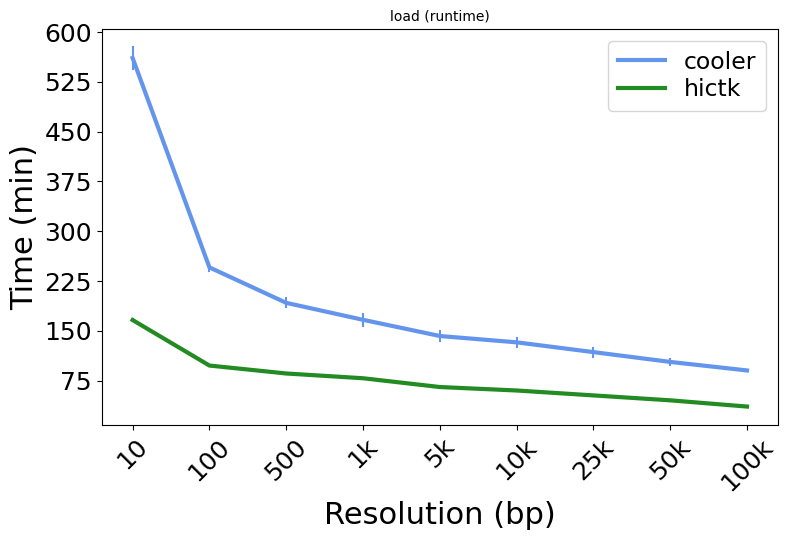

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))

sns.lineplot(
    df,
    x="resolution_pretty",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=True,
)

ax1.set(title="load (runtime)", ylabel="Time (min)", xlabel="Resolution (bp)")

ax1.tick_params(axis="x", rotation=45)

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk"),
    ],
    labelspacing=0.2,
    loc="upper right",
)

loc1 = plticker.MultipleLocator(base=75)
ax1.yaxis.set_major_locator(loc1)

fig.tight_layout()
fig.savefig("/tmp/load_runtime.png", dpi=600)
fig.savefig("/tmp/load_runtime.svg")

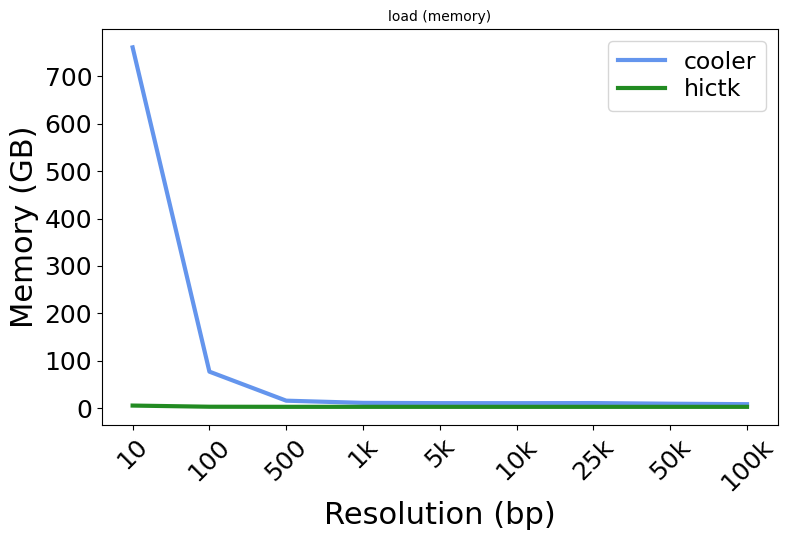

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))


sns.lineplot(
    df,
    x="resolution_pretty",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=False,
)

ax1.set(title="load (memory)", ylabel="Memory (GB)", xlabel="Resolution (bp)")

ax1.tick_params(axis="x", rotation=45)

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk"),
    ],
    labelspacing=0.2,
)

loc1 = plticker.MultipleLocator(base=100)
ax1.yaxis.set_major_locator(loc1)

fig.tight_layout()
fig.savefig("/tmp/load_memory.png", dpi=600)
fig.savefig("/tmp/load_memory.svg")